In [168]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df=pd.read_csv('web_attacks_balanced.csv') 
df.sample(5) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью.

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
4256,5069,845,57210.0,1601,80.0,6.0,24,5613766.0,3.0,1.0,...,32.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Web Attack – XSS
7120,29743,1261,39089.0,388,443.0,6.0,121,48.0,2.0,0.0,...,20.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN
57,69462,1265,14159.0,1599,53.0,17.0,186,163.0,2.0,2.0,...,32.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN
2299,7026,1260,42273.0,1137,443.0,6.0,224,115266622.0,46.0,43.0,...,32.0,52407.72727,51785.573230,208546.0,36595.0,10000000.0,3536.185127,10000000.0,9999852.0,BENIGN
5960,26973,1259,36336.0,4746,80.0,6.0,77,94872177.0,11.0,10.0,...,32.0,24003.33333,981.576411,26435.0,23487.0,10200000.0,986.586511,10200000.0,10200000.0,BENIGN


In [170]:
df.info() #общая информация о столбцах, типах и пропущенных значениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      7267 non-null   int64  
 1   Source IP                    7267 non-null   int64  
 2   Source Port                  7267 non-null   float64
 3   Destination IP               7267 non-null   int64  
 4   Destination Port             7267 non-null   float64
 5   Protocol                     7267 non-null   float64
 6   Timestamp                    7267 non-null   int64  
 7   Flow Duration                7267 non-null   float64
 8   Total Fwd Packets            7267 non-null   float64
 9   Total Backward Packets       7267 non-null   float64
 10  Total Length of Fwd Packets  7267 non-null   float64
 11  Total Length of Bwd Packets  7267 non-null   float64
 12  Fwd Packet Length Max        7267 non-null   float64
 13  Fwd Packet Length 

In [171]:
df.describe() #общие статистики

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7.267000e+03,7267.000000,7267.000000,...,7267.000000,7267.000000,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03
mean,27653.189212,1204.670290,42830.419155,1831.772121,5779.689693,9.733315,134.704280,1.022024e+07,9.182882,8.108298,...,5.045824,27.422595,5.498477e+04,3.038243e+04,1.119693e+05,3.925752e+04,2.475254e+06,8.708279e+04,2.535257e+06,2.380353e+06
std,27279.926011,499.069154,20680.019914,874.466190,16011.940093,5.212933,83.988227,2.638671e+07,79.655021,118.647957,...,74.275710,6.111466,5.666915e+05,2.681633e+05,8.214085e+05,5.289145e+05,1.071754e+07,1.386914e+06,1.090592e+07,1.060371e+07
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4783.500000,845.000000,36203.000000,1594.000000,53.000000,6.000000,48.000000,2.585000e+02,2.000000,1.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,15191.000000,1258.000000,50576.000000,1599.000000,80.000000,6.000000,121.000000,1.068230e+05,3.000000,1.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,44920.500000,1263.000000,57959.500000,1601.000000,443.000000,17.000000,217.000000,5.562295e+06,3.000000,2.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,89865.000000,4200.000000,65533.000000,5213.000000,64295.000000,17.000000,240.000000,1.199942e+08,4411.000000,7127.000000,...,4358.000000,44.000000,3.550000e+07,9.340273e+06,3.550000e+07,3.550000e+07,1.190000e+08,3.770000e+07,1.190000e+08,1.190000e+08


In [172]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [173]:
col=['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label']

In [174]:
X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [175]:
X.sample(100)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2040,35019,1256,3693.0,1599,53.0,17.0,221,36269.0,2.0,2.0,...,20.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,0
4562,5356,845,60478.0,1601,80.0,6.0,29,5229561.0,3.0,1.0,...,32.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,2
4779,3542,845,34534.0,1601,80.0,6.0,32,5113601.0,3.0,1.0,...,32.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,2
2661,3914,845,41518.0,1601,80.0,6.0,230,75.0,1.0,1.0,...,32.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,1
3698,39528,1257,57862.0,1599,53.0,17.0,9,229.0,2.0,2.0,...,32.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,4388,845,49168.0,1601,80.0,6.0,238,5913326.0,3.0,1.0,...,32.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,1
466,85051,1266,44865.0,5128,443.0,6.0,199,65477936.0,34.0,34.0,...,32.0,200527.8333,202191.7991,613214.0,116003.0,10000000.0,11636.75507,10000000.0,9997417.0,0
1536,5051,845,57000.0,1601,80.0,6.0,216,5388983.0,3.0,1.0,...,32.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,1
2696,3938,845,42124.0,1601,80.0,6.0,230,5667706.0,3.0,1.0,...,32.0,0.0000,0.0000,0.0,0.0,0.0,0.00000,0.0,0.0,1


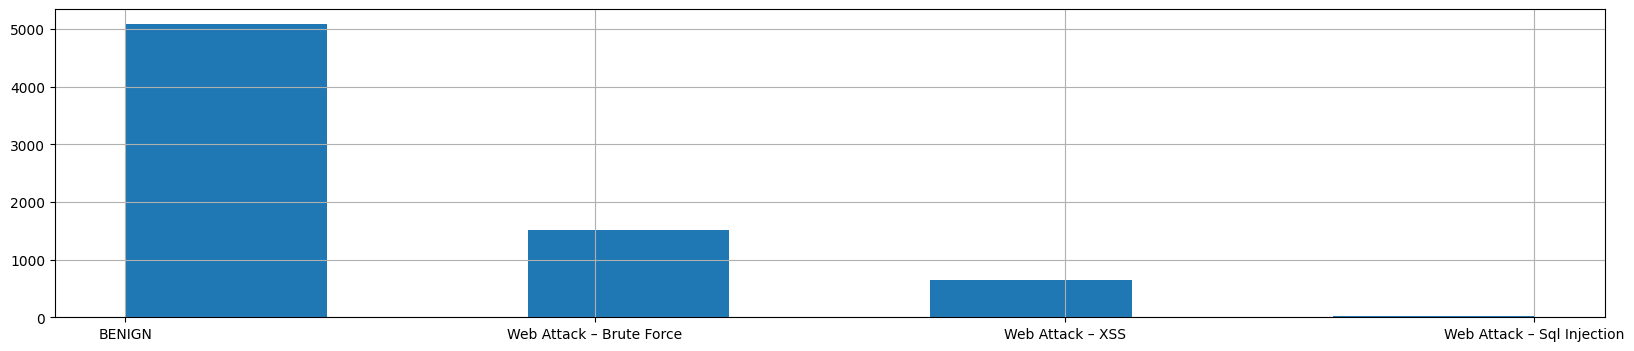

In [176]:
df['Label'].hist(bins=7, figsize=(20,4)); # как распределено количество атак

In [177]:
# Y будет равен нулю если нет атаки и 1 если атака есть 
Y=df['Label'].apply(lambda x: 0 if x=='BENING' else 1).values

In [178]:
y = df['Label'].values
X = df.drop(columns=['Label'])
print(X.shape, y.shape)

(7267, 83) (7267,)


In [179]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5086, 83) (5086,)
(2181, 83) (2181,)


In [180]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
# Score = mean accuracy on the given test data and labels
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

R^2 Training Score: 1.00 
R^2 Validation Score: 1.00 
Out-of-bag Score: 1.00


In [181]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []

for index, i in enumerate(indices[:20]):
    webattack_features.append(features[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#6	0.158	Timestamp
2.	#1	0.145	Source IP
3.	#72	0.096	Init_Win_bytes_backward
4.	#0	0.066	Flow ID
5.	#59	0.041	Avg Fwd Segment Size
6.	#46	0.038	Packet Length Mean
7.	#10	0.032	Total Length of Fwd Packets
8.	#30	0.032	Fwd IAT Min
9.	#2	0.031	Source Port
10.	#12	0.030	Fwd Packet Length Max
11.	#45	0.028	Max Packet Length
12.	#20	0.028	Flow Bytes/s
13.	#28	0.026	Fwd IAT Std
14.	#4	0.025	Destination Port
15.	#58	0.018	Average Packet Size
16.	#71	0.017	Init_Win_bytes_forward
17.	#29	0.015	Fwd IAT Max
18.	#14	0.015	Fwd Packet Length Mean
19.	#22	0.014	Flow IAT Mean
20.	#42	0.013	Fwd Packets/s


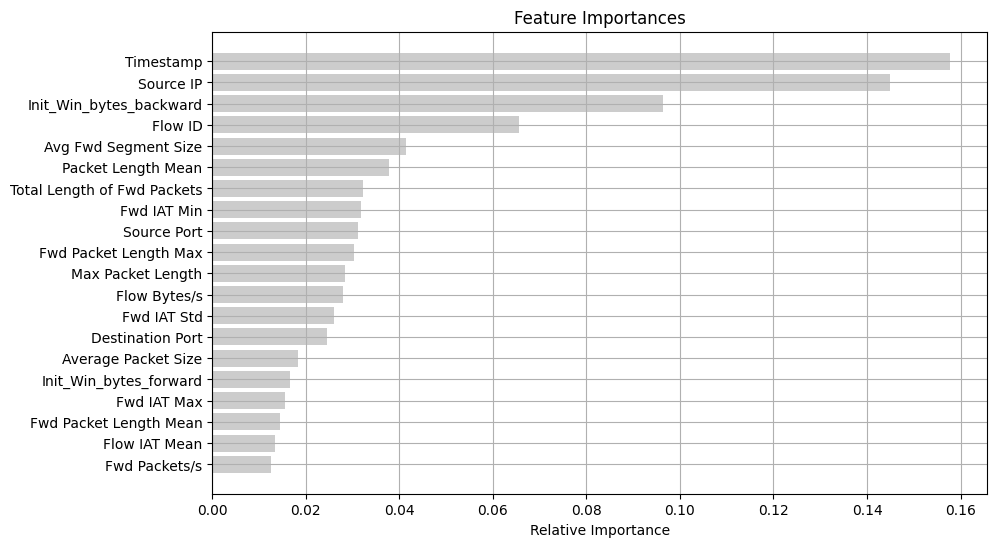

In [182]:
indices = np.argsort(importances)[-20:]
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

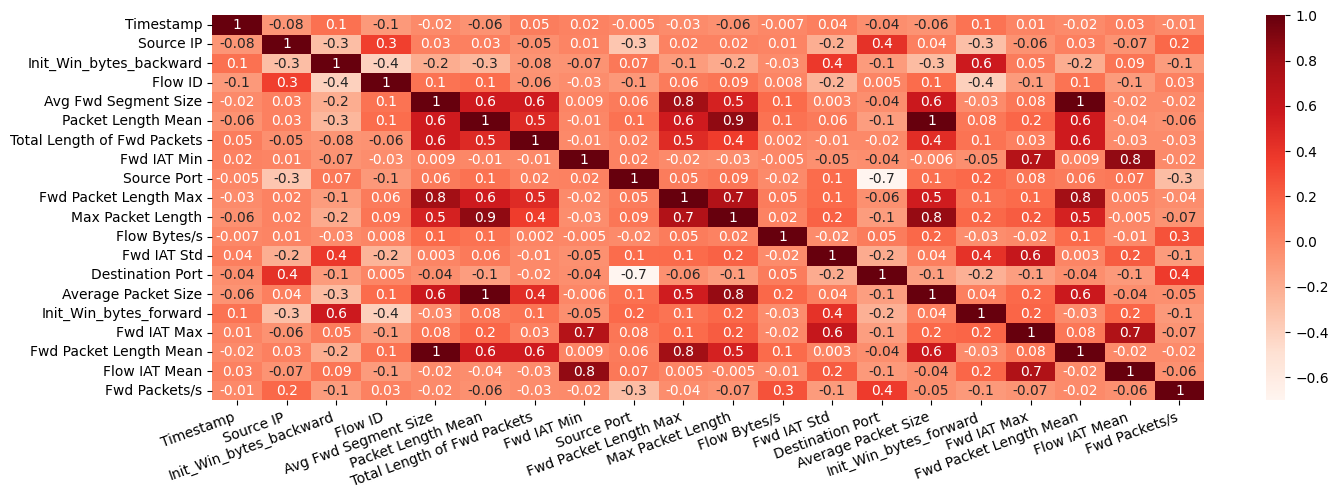

In [183]:
import seaborn as sns
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Reds')
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=20);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

In [184]:
to_be_removed = {'Timestamp',
 'Source IP',
 'Flow ID',
 'Init_Win_bytes_backward',
 'Source Port',
 'Average Packet Size',
 'Flow Bytes/s',
 'Max Packet Length',
 'Fwd Packet Length Mean',
 'Total Length of Fwd Packets'}
webattack_features = [item for item in webattack_features if item not in to_be_removed]
webattack_features = webattack_features[:10]
webattack_features

['Avg Fwd Segment Size',
 'Packet Length Mean',
 'Fwd IAT Min',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Destination Port',
 'Init_Win_bytes_forward',
 'Fwd IAT Max',
 'Flow IAT Mean',
 'Fwd Packets/s']

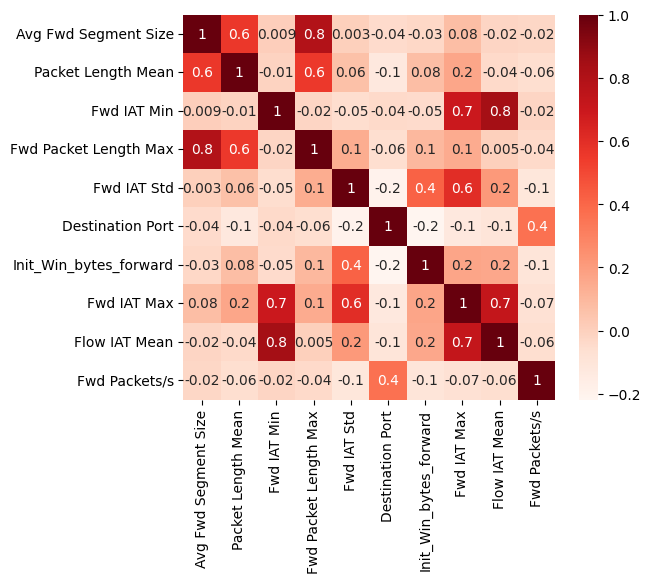

In [185]:
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Reds');

In [186]:
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y = df['Label'].values
X = df[webattack_features]
print(X.shape, y.shape)

(7267, 10) (7267,)


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5086, 10) (5086,)
(2181, 10) (2181,)


In [188]:
rfc = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)
# rfc = RandomForestClassifier(n_estimators=250, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

In [189]:
import time
seconds = time.time()
y_pred = rfc.predict(X_test)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.01400136947631836 seconds
Benign records detected (0), attacks detected (1):


{0: 1525, 1: 656}

In [190]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
    
for index, i in enumerate(indices[:10]):
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#1	0.609	Packet Length Mean
2.	#5	0.251	Destination Port
3.	#6	0.040	Init_Win_bytes_forward
4.	#0	0.037	Avg Fwd Segment Size
5.	#2	0.023	Fwd IAT Min
6.	#8	0.023	Flow IAT Mean
7.	#3	0.006	Fwd Packet Length Max
8.	#9	0.005	Fwd Packets/s
9.	#7	0.003	Fwd IAT Max
10.	#4	0.002	Fwd IAT Std


In [191]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1525,    6],
       [   0,  650]], dtype=int64)

In [192]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9972489683631361
Precision = 0.9908536585365854
Recall = 1.0
F1 = 0.9954058192955589


In [193]:
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1525,    6],
       [   0,  650]], dtype=int64)

In [194]:
predict = pd.DataFrame({'Predict': rfc.predict(X_test)})
label = pd.DataFrame({'Label': y_test})
result = X_test.join(label).join(predict)
result[result['Predict'] == 1]

,Avg Fwd Segment Size,Packet Length Mean,Fwd IAT Min,Fwd Packet Length Max,Fwd IAT Std,Destination Port,Init_Win_bytes_forward,Fwd IAT Max,Flow IAT Mean,Fwd Packets/s,Label,Predict
2080,0.000000,0.000000,1130.0,0.0,3653996.919,80.0,29200.0,5168662.0,1.723264e+06,0.580294,1.0,1.0
230,53.000000,80.800000,60800000.0,60.0,0.000,53.0,-1.0,60800000.0,2.030000e+07,0.032875,1.0,1.0
132,106.937500,204.483871,8362.0,674.0,5024812.452,443.0,8192.0,10100000.0,2.107640e+06,0.261773,1.0,1.0
1321,214.666667,203.750000,32556.0,638.0,1069961.454,80.0,8192.0,1545710.0,2.700478e+05,1.851524,1.0,1.0
957,6.000000,6.000000,3.0,6.0,0.000,58754.0,32.0,3.0,3.000000e+00,666666.666700,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,6.000000,6.000000,0.0,6.0,0.000,80.0,237.0,0.0,2.389400e+04,41.851511,1.0,1.0
292,0.000000,0.000000,0.0,0.0,0.000,50869.0,126.0,0.0,1.770000e+02,5649.717514,1.0,1.0
272,46.000000,56.666667,0.0,46.0,0.000,53.0,-1.0,0.0,3.026400e+04,33.042559,1.0,1.0
613,0.000000,0.000000,661.0,0.0,4069545.190,80.0,29200.0,5755867.0,1.918843e+06,0.521147,1.0,1.0
